In [1]:
!apt-get update --fix-missing

!apt-get install -y \
    libgl1-mesa-dev \
    libgl1-mesa-glx \
    libglew-dev \
    libosmesa6-dev \
    software-properties-common

!apt-get install -y patchelf

!pip install gym
!pip install free-mujoco-py

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,070 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,343 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/m

In [2]:
!pip install --upgrade setuptools==65.5.1
!pip install --upgrade pip wheel==0.38.4
!pip install stable-baselines3==1.6.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cvxpy 1.3.3 requires setuptools>65.5.1, but you have setuptools 65.5.1 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.7 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.42.0
    Uninstalling wheel-0.42.0:
      Successfully uninstalled wheel-0.42.0
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.0/170.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616795 sha256=b0e7506d14447411a2388b1f68ec0a786e57709625ff574066c9e07af54ad46b
  Stored in directory: /root/.cache/pip/wheels/81/aa/90/b67df76370d3916a2189b662cf48da38ce41a4e7e58b6abff5
Successfully built gym
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.1
    Uninstalling importlib-metadata-7.0.1:
      

Set up the custom Hopper environment and provided util functions



1.   Upload `custom_hopper.zip` to the current session's file storage
2.   Un-zip it by running cell below


In [3]:
!unzip -o custom_hopper.zip

Archive:  custom_hopper.zip
   creating: env/
 extracting: env/__init__.py         
  inflating: env/custom_hopper.py    
  inflating: __MACOSX/env/._custom_hopper.py  
  inflating: env/mujoco_env.py       
   creating: env/assets/
  inflating: env/assets/hopper.xml   




---



In [1]:
import gym
from env.custom_hopper import *

In [2]:
env_src = gym.make('CustomHopper-source-v0')
env_target = gym.make('CustomHopper-target-v0')

print('State space:', env_src.observation_space)  # state-space
print('Action space:', env_src.action_space)  # action-space
print('Dynamics parameters:', env_src.get_parameters())  # masses of each link of the Hopper

State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
Dynamics parameters: [2.53429174 3.92699082 2.71433605 5.0893801 ]


In [3]:
print(f'Bodies defined in the environment:\n {env_src.sim.model.body_names}\n')
print(f'Mass of all the corresponding bodies:\n {env_src.sim.model.body_mass}\n')
print(f'Number of degrees of freedom (DoFs) of the robot:\n {env_src.sim.model.nv}\n')
print(f'Number of DoFs for each body:\n {env_src.sim.model.body_dofnum}\n')
print(f'Number of actuators:\n {env_src.sim.model.nu}\n')
#Box -> Contiuos action and state spaces
print(f'State space:\n {env_src.observation_space}\n')
print(f'Action space:\n {env_src.action_space}\n')
print(f'Mass of all the bodies of the target:\n {env_target.sim.model.body_mass}\n')

Bodies defined in the environment:
 ('world', 'torso', 'thigh', 'leg', 'foot')

Mass of all the corresponding bodies:
 [0.         2.53429174 3.92699082 2.71433605 5.0893801 ]

Number of degrees of freedom (DoFs) of the robot:
 6

Number of DoFs for each body:
 [0 3 1 1 1]

Number of actuators:
 3

State space:
 Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)

Action space:
 Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)

Mass of all the bodies of the target:
 [0.         3.53429174 3.92699082 2.71433605 5.0893801 ]



In [4]:
## Imports and global variables definition

from stable_baselines3 import PPO, SAC
from stable_baselines3.common.evaluation import evaluate_policy
import numpy as np
import matplotlib.pyplot as plt

import os
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy

alg = 'ppo'
train_episodes = 100000
test_episodes = 50

src_log_dir = "./tmp/gym/src/"
target_log_dir = "./tmp/gym/target/"
os.makedirs(src_log_dir, exist_ok=True)
os.makedirs(target_log_dir, exist_ok=True)
# Logs will be saved in src_log_dir/ (for the source model) and target_log_dir (for the target model)
env_src = Monitor(env_src, src_log_dir)
env_target = Monitor(env_target, target_log_dir)

In [5]:
def create_model(alg, env):
    if alg == 'ppo':
        model = PPO("MlpPolicy", env)
    elif alg == 'sac':
        model = SAC("MlpPolicy", env)
    else:
        raise ValueError(f"RL Algo not supported: {alg}")
    return model

def load_model(alg, env, file):
    if alg == 'ppo':
        model = PPO.load(file, env=env)
    elif alg == 'sac':
        model = SAC.load(file, env=env)
    else:
        raise ValueError(f"RL Algo not supported: {alg}")
    return model

def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, "valid")


def plot_results(log_folder, title="Learning Curve"):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), "timesteps")
    y = moving_average(y, window=50)
    # Truncate x
    x = x[len(x) - len(y) :]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel("Number of Timesteps")
    plt.ylabel("Rewards")
    plt.title(title)
    plt.show()

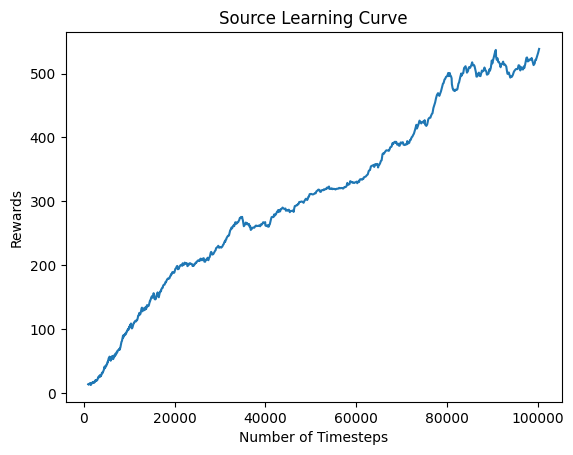

In [9]:
## Train Source Model

try:
    model = create_model(alg, env_src)
    # Policy training
    model.learn(int(train_episodes))
    # Saving model
    model.save('source_model.mdl')
    plot_results(src_log_dir, title="Source Learning Curve")
# Handle Ctrl+C - save model and go to tests
except KeyboardInterrupt:
    print("Interrupted!")

In [10]:
## Train Target Model

try:
    model = create_model(alg, env_target)
    # Policy training
    model.learn(int(train_episodes))
    # Saving model
    model.save('target_model.mdl')
    #plot_results(target_log_dir,title="Target Learning Curve")
# Handle Ctrl+C - save model and go to tests
except KeyboardInterrupt:
    print("Interrupted!")

In [11]:
## Policy Evaluation

# Source -> Source
#env_src = gym.make('CustomHopper-source-v0')
print('Source -> Source')
model = load_model(alg, env_src, 'source_model.mdl')
mean_reward, std_reward = evaluate_policy(model,env_src,n_eval_episodes=test_episodes)
print(f"Test reward (avg +/- std): ({mean_reward} +/- {std_reward}) - Num episodes: {test_episodes}")

# Source -> Target
#env_target = gym.make('CustomHopper-target-v0')
print('Source -> Target')
model = load_model(alg, env_target, 'source_model.mdl')
mean_reward, std_reward = evaluate_policy(model,env_target,n_eval_episodes=test_episodes)
print(f"Test reward (avg +/- std): ({mean_reward} +/- {std_reward}) - Num episodes: {test_episodes}")

# Target -> Target
#env_target = gym.make('CustomHopper-target-v0')
print('Target -> Target')
model = load_model(alg, env_target, 'target_model.mdl')
mean_reward, std_reward = evaluate_policy(model,env_target,n_eval_episodes=test_episodes)
print(f"Test reward (avg +/- std): ({mean_reward} +/- {std_reward}) - Num episodes: {test_episodes}")


Source -> Source
Test reward (avg +/- std): (660.12069936 +/- 10.697977960451682) - Num episodes: 50
Source -> Target
Test reward (avg +/- std): (640.2089180799999 +/- 13.07183264465751) - Num episodes: 50
Target -> Target
Test reward (avg +/- std): (906.3729590600001 +/- 181.298144551533) - Num episodes: 50


In [12]:
# Domain Randomization Hopper

env_dr = gym.make('CustomHopper-dr-v0')

dr_log_dir = "./tmp/gym/dr/"
os.makedirs(dr_log_dir, exist_ok=True)
env_dr = Monitor(env_src, dr_log_dir)

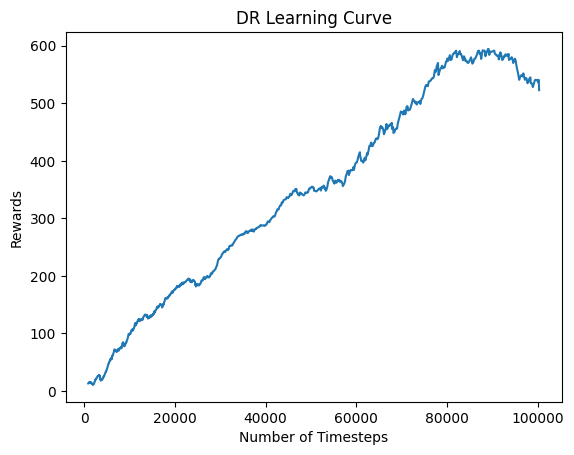

In [13]:
## Train DR Model
try:
    model = create_model(alg, env_dr)
    # Policy training
    model.learn(int(train_episodes))
    # Saving model
    model.save('dr_model.mdl')
    plot_results(dr_log_dir, title="DR Learning Curve")
# Handle Ctrl+C - save model and go to tests
except KeyboardInterrupt:
    print("Interrupted!")

In [14]:
## Policy Evaluation
#env_dr = gym.make('CustomHopper-target-v0')
model = load_model(alg, env_target, 'dr_model.mdl')
mean_reward, std_reward = evaluate_policy(model,env_target,n_eval_episodes=test_episodes)
print(f"Test reward (avg +/- std): ({mean_reward} +/- {std_reward}) - Num episodes: {test_episodes}")

Test reward (avg +/- std): (642.1412406200001 +/- 8.14763954779257) - Num episodes: 50


In [13]:
import gym
from gym import error, spaces, utils
from gym.utils import seeding
import gym.spaces
import numpy as np

class AdversarialAgent(gym.Env):
  metadata = {'render.modes': ['human']}

  def __init__(self,agent,agent_env,num_ep):

    self.action_space = spaces.Box(
        low=np.array([1.0,1.0,1.0]),
        high=np.array([10.0, 10.0, 10.0])
    )
    # The observation is the reward of the agent trained with the
    # generated masses
    self.observation_space = spaces.Box(
        low = np.array([1.0,1.0,1.0]),
        high=np.array([10.0, 10.0, 10.0])
    )

    #agent to use to generate the reward
    #to update at the end of every cycle
    self.agent = agent
    self.agent_env = agent_env

    #Training parameters
    # - number of episode on which to test the new masses
    self.num_ep = num_ep


  def step(self, action):
    """
    This method is the primary interface between environment and agent.
    """
    generated_masses = action
    returns = []
    #self.agent_env.set_custom_parameters(action)
    for t in range(self.num_ep):
      current_return = 0
      obs = self.agent_env.reset()
      self.agent_env.set_custom_parameters(generated_masses)
      for _ in range(500):
        agent_action, _ = self.agent.predict(obs)
        obs, reward, done, _ = self.agent_env.step(agent_action)
        current_return+=reward
        if done:
          break
      returns.append(current_return)
    #mean_reward, std_reward = evaluate_policy(self.agent,self.agent_env,n_eval_episodes=self.num_ep)
    mean_reward = np.mean(np.array(returns))

    reward = 1/mean_reward
    print(f'{generated_masses}->{mean_reward}->{reward}')

    return np.array([generated_masses],dtype=np.float32), reward, True, {}

  def reset(self):
    """
    This method resets the environment to its initial values.

    Returns:
        observation:    array
                        the initial state of the environment
    """
    #mean_reward, std_reward = evaluate_policy(self.agent,self.agent_env,n_eval_episodes=self.num_ep)
    masses = self.agent_env.get_parameters()
    masses = masses[1:]
    #print(masses)
    return np.array([masses],dtype=np.float32)

  def render(self, mode='human', close=False):
    """
    This methods provides the option to render the environment's behavior to a window
    which should be readable to the human eye if mode is set to 'human'.
    """
    pass

  def close(self):
    """
    This method provides the user with the option to perform any necessary cleanup.
    """
    pass

gym.envs.register(
        id="AdversarialAgent-v0",
        entry_point="%s:AdversarialAgent" % __name__,
        max_episode_steps=10
)

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:216: UserWarning: WARN: Overriding environment AdversarialAgent-v0
  logger.warn("Overriding environment {}".format(id))


In [14]:
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.callbacks import StopTrainingOnMaxEpisodes
from stable_baselines3 import SAC, PPO

agent_env = gym.make('CustomHopper-deception-v0')
model = PPO('MlpPolicy', agent_env)

deception_env = gym.make("AdversarialAgent-v0",agent=model,agent_env=agent_env,num_ep=10)
#check_env(deception_env)

deception = SAC('MlpPolicy', deception_env)

agent_env.set_deceptor(deception)

total_episodes = 0
max_step = 500

callback_max_episodes = StopTrainingOnMaxEpisodes(max_episodes=10)

thighs = []
legs = []
foots = []

while total_episodes<200:

    #Train deception module
    for i in range(20):
      deception.learn(1, callback_max_episodes)

    #Train Agent
    model.learn(500)

    total_episodes+=1
    print('\n',f'{total_episodes}','\n')

model.save('deception_model_agent_dr.mdl')

/usr/local/lib/python3.10/dist-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


[5.1784477 2.0597925 9.390136 ]->9.89615818588301->0.10104931441238603
[1.8822713 7.375417  6.078388 ]->13.097174020280784->0.07635234886942134
[1.7238297 2.222205  9.381063 ]->8.532932658457433->0.11719300269044641
[8.858975  7.3625093 5.582591 ]->23.743860616542303->0.04211615019771898
[2.0041475 6.205555  5.2725034]->25.413573757533538->0.039349050611331766
[5.3432713 1.4048316 4.0130377]->15.495694143543517->0.06453405641183638
[1.5943153 5.174284  8.027107 ]->15.651393594666624->0.06389207414352933
[1.4898003 2.2488983 7.508077 ]->12.081791704593766->0.08276918063566498
[8.694805 7.715763 8.36289 ]->13.778059572841599->0.0725791607093305
[3.392973  5.0795126 5.463703 ]->26.329130032658576->0.03798074599349097
[7.060569  3.7960541 4.6442194]->17.327936362498207->0.05771027657766789
[9.294547  1.2892808 3.6288092]->12.857466908522738->0.07777581751636763
[3.8984733 8.473177  1.5515568]->11.467682847595173->0.08720157448457033
[9.126344  7.888457  2.4051085]->11.711048944792317->0.08

KeyboardInterrupt: 

In [8]:
## Policy Evaluation

env_target = gym.make('CustomHopper-target-v0')
model = load_model('ppo', env_target, 'deception_model_agent_dr.mdl')
mean_reward, std_reward = evaluate_policy(model,env_target,n_eval_episodes=test_episodes)
print(f"Test reward (avg +/- std): ({mean_reward} +/- {std_reward}) - Num episodes: {test_episodes}")
env_target.close()

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Test reward (avg +/- std): (754.6129617714882 +/- 44.48523609604987) - Num episodes: 50
